In [ ]:
# https://www.kaggle.com/code/devisangeetha/network-visualizations-with-igraph/script

In [2]:
install.packages('igraph')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
install.packages('ggraph')

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
library(ggplot2) 
library(readr) 
library(igraph)
library(ggraph)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()



In [6]:
stacknodes<-read.csv("./stack_network_nodes.csv")
str(stacknodes)
stacklinks<-read.csv("./stack_network_links.csv")
str(stacklinks)

'data.frame':	115 obs. of  3 variables:
 $ name    : chr  "html" "css" "hibernate" "spring" ...
 $ group   : int  6 6 8 8 3 3 4 4 6 1 ...
 $ nodesize: num  272.4 341.2 29.8 52.8 70.1 ...
'data.frame':	490 obs. of  3 variables:
 $ source: chr  "azure" "sql-server" "asp.net" "entity-framework" ...
 $ target: chr  ".net" ".net" ".net" ".net" ...
 $ value : num  20.9 32.3 48.4 24.4 32.4 ...


In [7]:
set.seed(1234)
g1 <- graph_from_data_frame(d = stacklinks, vertices = stacknodes, directed = FALSE)


In [8]:
## Edges
E(g1)

## Vetices
V(g1)

table(head_of(g1, E(g1)))
V(g1)$degree<-degree(g1)
gorder(g1) 

+ 490/490 edges from dff08e6 (vertex names):
 [1] .net               --azure            .net               --sql-server      
 [3] asp.net            --.net             .net               --entity-framework
 [5] .net               --wpf              .net               --linq            
 [7] .net               --wcf              c#                 --.net            
 [9] tdd                --agile            ajax               --codeigniter     
[11] jquery             --ajax             mysql              --ajax            
[13] css                --ajax             php                --ajax            
[15] javascript         --ajax             ajax               --json            
[17] amazon-web-services--cloud            amazon-web-services--azure           
[19] amazon-web-services--devops          
+ ... omitted several edges

+ 115/115 vertices, named, from dff08e6:
  [1] html                css                 hibernate          
  [4] spring              ruby                ruby-on-rails      
  [7] ios                 swift               html5              
 [10] c                   c++                 asp.net            
 [13] c#                  objective-c         javascript         
 [16] jquery              redux               reactjs            
 [19] php                 mysql               spring-mvc         
 [22] .net                react-native        spring-boot        
 [25] less                sass                hadoop             
 [28] apache-spark        sql-server          express            
+ ... omitted several vertices


  2   4   6   8   9  11  13  14  15  16  18  19  20  21  22  23  24  25  26  28 
  2   2   2   2   2   2   2   4   6  10   4  10  10   4   4   4   6   4  14   2 
 29  30  31  32  33  35  37  38  39  40  41  42  43  44  45  47  48  49  50  51 
  6   4  10   8   6   2   2   8  10  12  12   2  12   4  10   6   4   8   2   2 
 52  53  54  56  57  58  59  60  61  62  63  64  65  66  67  68  70  71  72  73 
 18  12   4   2   4   2   4   8   8   6   8   2  10   2   2  12   2  12   4   8 
 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94 
  2   2   4   4   2   2   2   6   2   2   4   2   2   4   2   4   2   2   2  12 
 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 
 10   2   2   6   2   6   2   4   4   2  10   2   2   2   4   2   2   2   2   2 

[1] 115

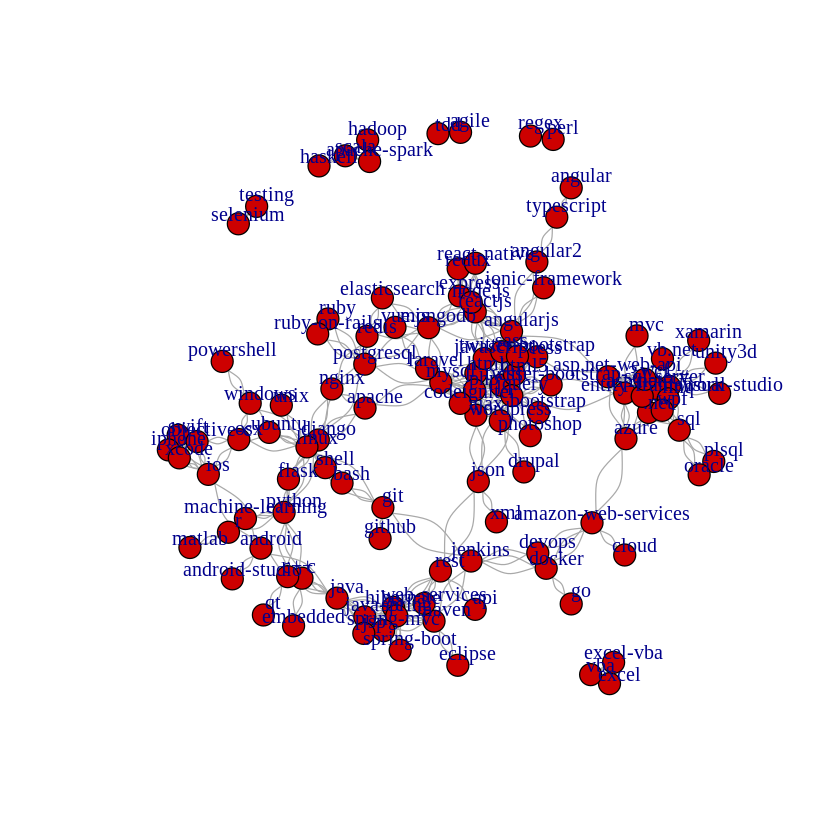

In [9]:
plot(g1,vertex.color="red3",vertex.size=8,edge.arrow.size=0.3,
     vertex.label.cex=0,vertex.label.dist=0.7)


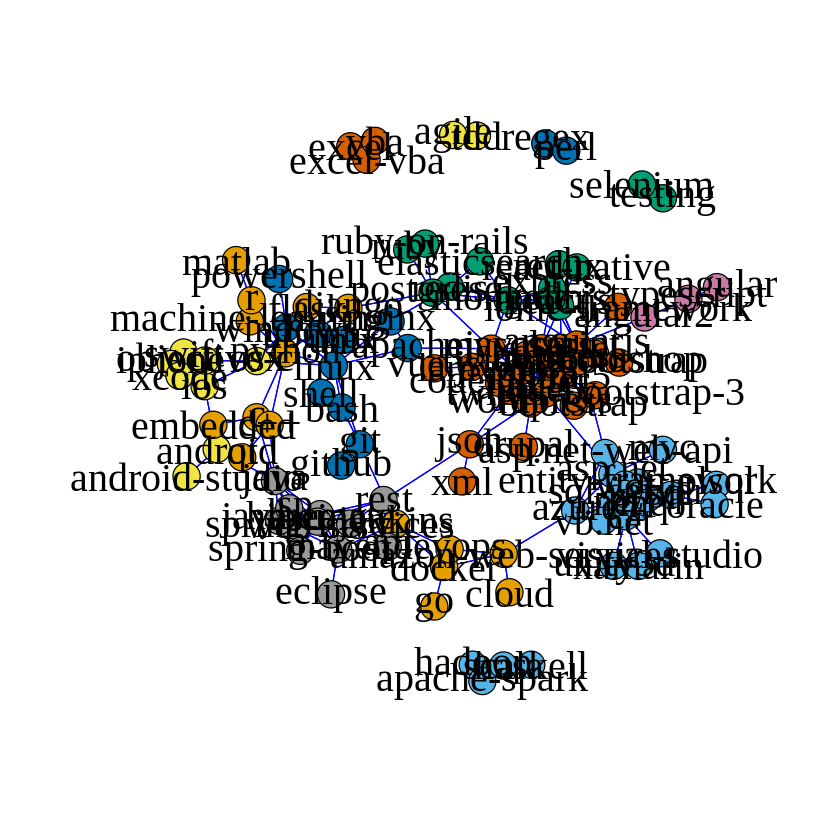

In [10]:
plot(g1, edge.arrow.size=1.5, edge.curved=0,

     vertex.color=V(g1)$group, 
     vertex.size=10,

     vertex.label=V(g1)$value, vertex.label.color="black",

     vertex.label.cex=2,edge.color="blue")  


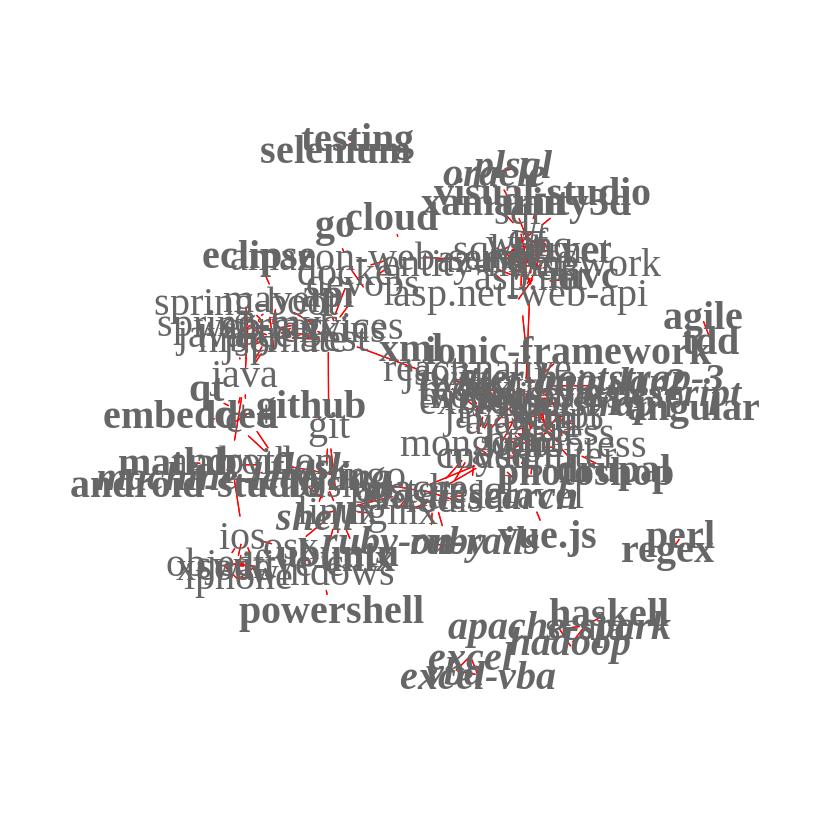

In [11]:
plot(g1, vertex.shape="none", vertex.label=V(g1)$name, 

     vertex.label.font=V(g1)$degree, vertex.label.color="gray40",edge.arrow.size=0.5,directed=TRUE,

     vertex.label.cex=2, edge.color="red",edge.curved=0)


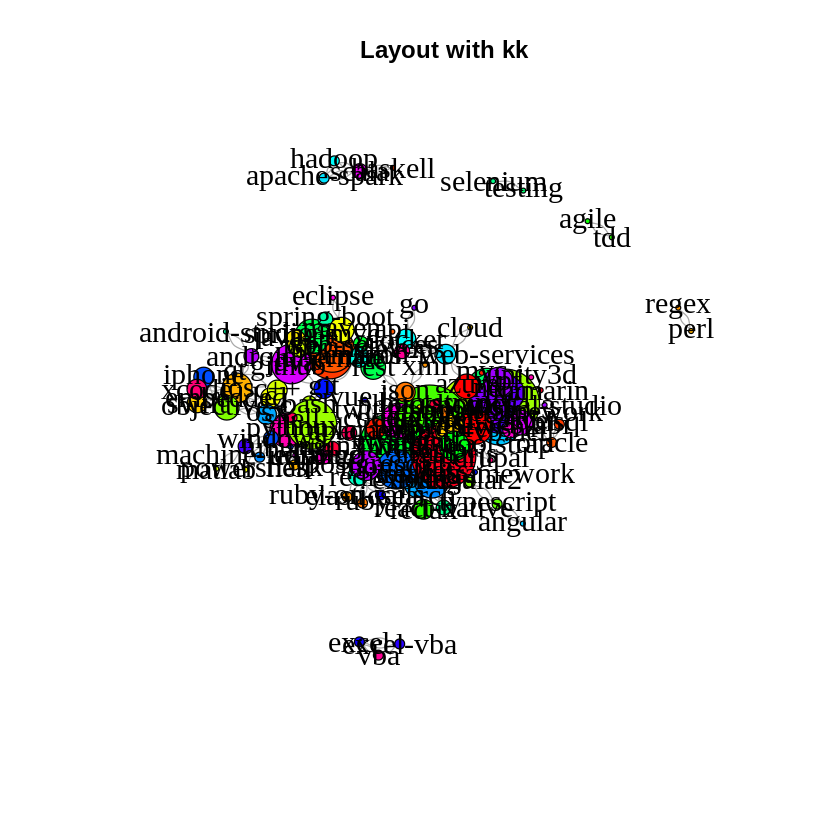

In [12]:
plot(g1,vertex.color=rainbow(52),
     vertex.label=V(g1)$name,
     vertex.size=V(g1)$degree,
     vertex.label.cex=1.5,
     vertex.label.color="black",
     edge.arrow.size=0.3,
          layout=layout.kamada.kawai(g1),
     vertex.label.cex=0.7,main="Layout with kk")


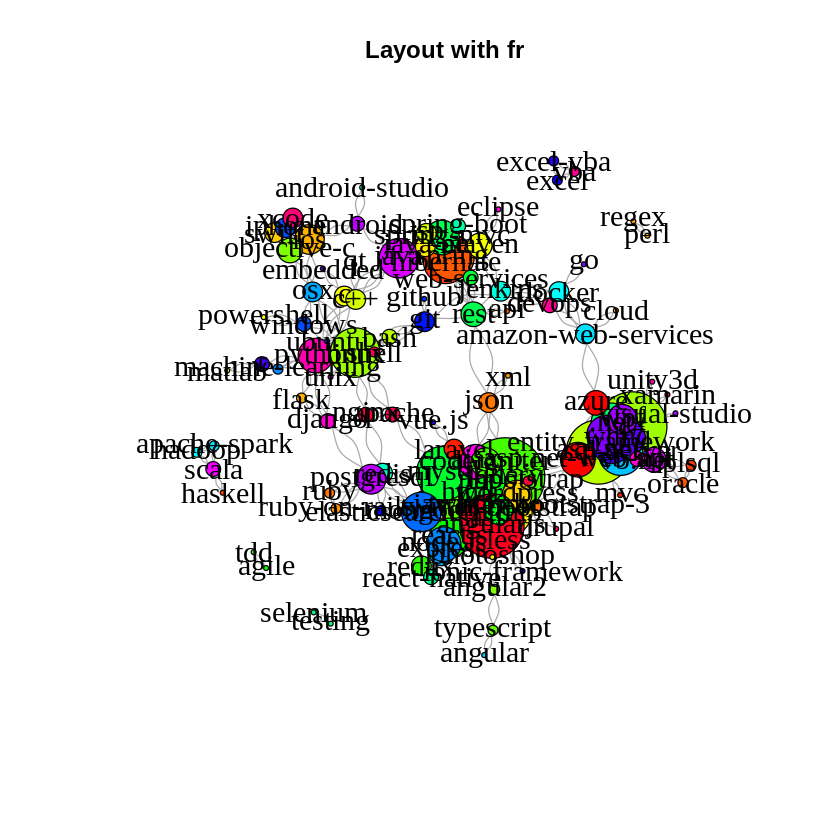

In [13]:
plot(g1,vertex.color=rainbow(52),
     vertex.label=V(g1)$name,
     vertex.label.cex=1.5,
     vertex.size=V(g1)$degree,
     edge.arrow.size=0.3,
     vertex.label.color="black",
          layout=layout.fruchterman.reingold(g1),
     vertex.label.cex=0.7,main="Layout with fr")


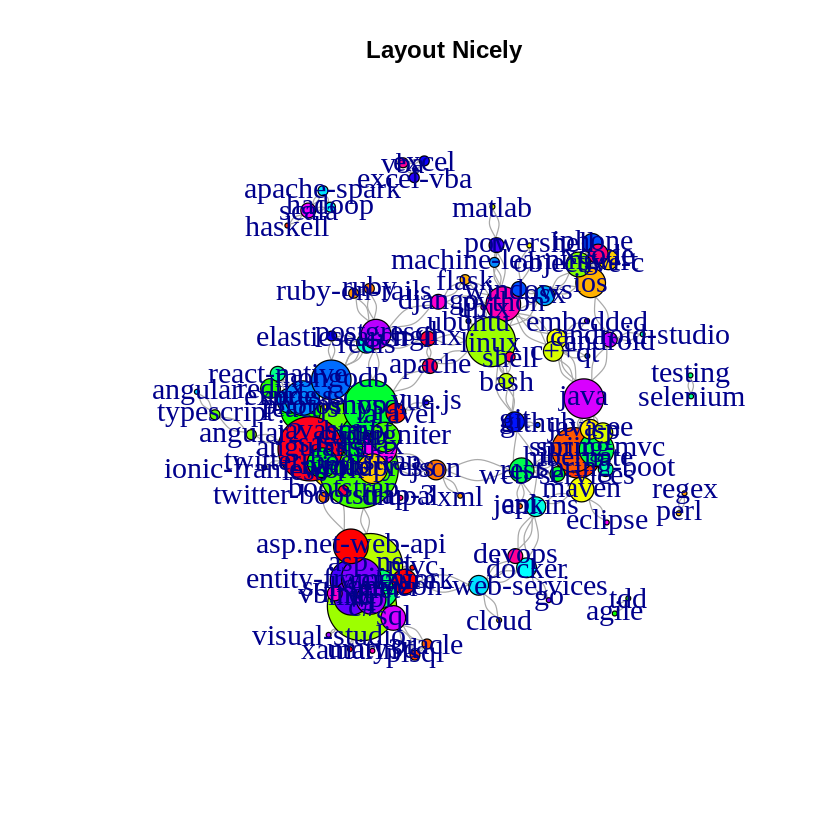

In [14]:
plot(g1,vertex.color=rainbow(52),
     vertex.label=V(g1)$name,
     vertex.label.cex=1.5,
     vertex.size=V(g1)$degree,
     edge.arrow.size=0.3,
          layout=layout_nicely(g1),
     vertex.label.cex=0.7,main="Layout Nicely")


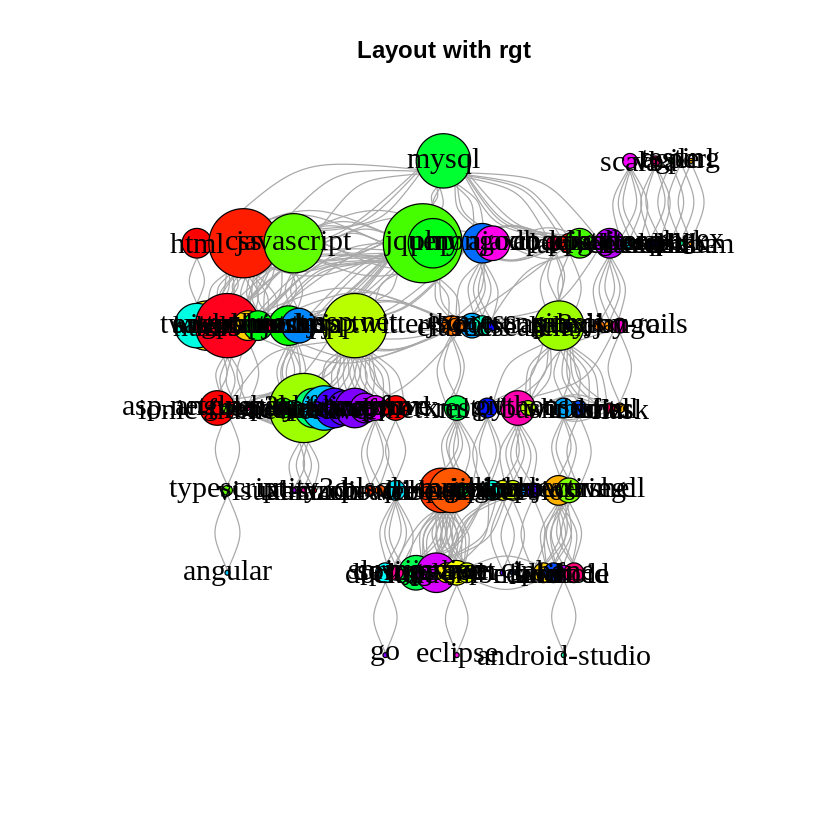

In [15]:
plot(g1,vertex.color=rainbow(52),
     vertex.label=V(g1)$name,
     vertex.label.cex=1.5,
     vertex.size=V(g1)$degree,
     edge.arrow.size=0.3,
     vertex.label.color="black",
          layout=layout.reingold.tilford(g1),
     vertex.label.cex=0.7,main="Layout with rgt")


In [16]:
g.outd<- degree(g1, mode = c("out"))
#hist(g.outd, breaks = 30)
table(g.outd)
which.max(g.outd)


g.outd
 2  4  6  8 10 12 14 16 18 20 22 24 26 28 32 
29 17 14 16  6  7  6  6  4  3  1  1  2  2  1 

jquery 
    16

In [17]:
g.b <- betweenness(g1, directed = T)


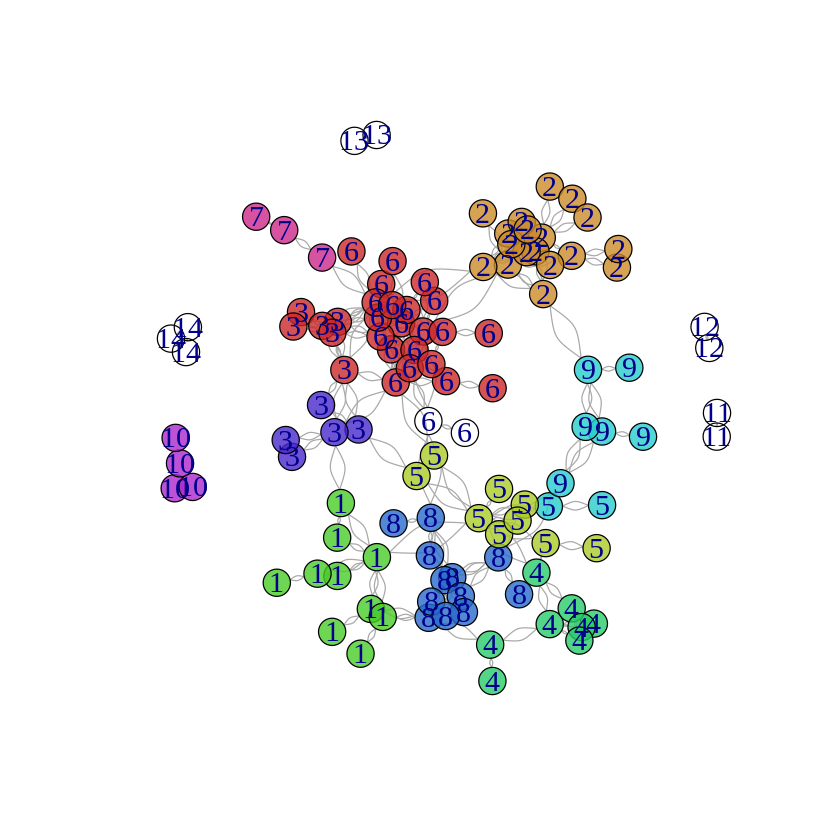

In [18]:
layout <-layout.fruchterman.reingold(g1)
eb <- edge.betweenness.community(g1)
membership <- cut_at(eb, no = 15)
plot(g1,
  vertex.color= rainbow(10, .8, .8, alpha=.8)[membership],vertex.size=10,
     vertex.label=V(g1)$group,vertex.label.cex=1.5,layout=layout,
  edge.arrow.size=.3)


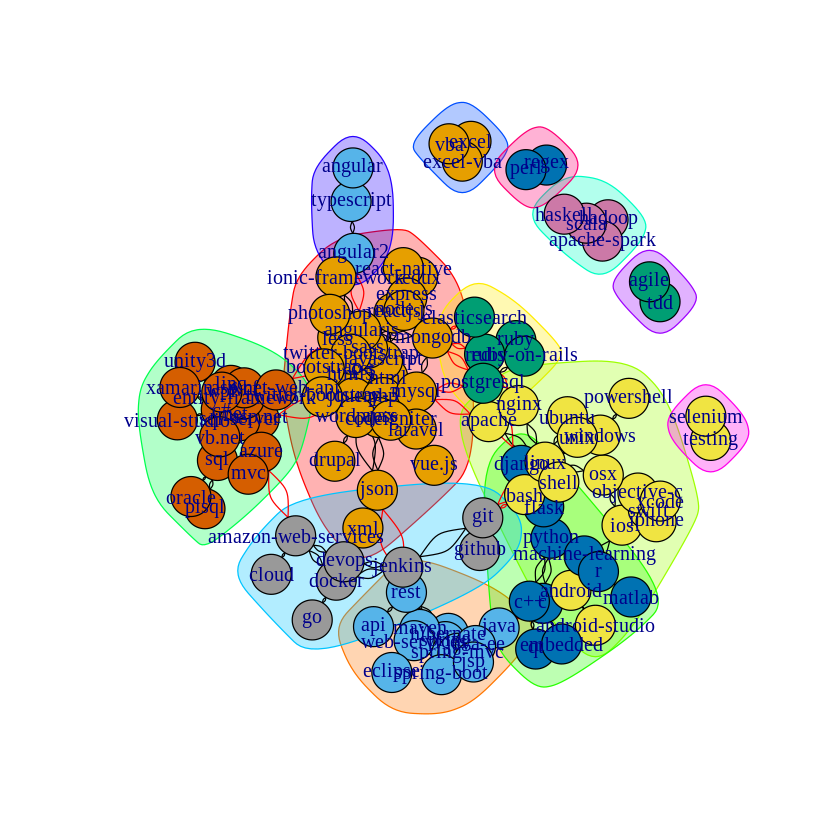

In [19]:
ceb <- cluster_edge_betweenness(g1) 
plot(ceb, g1) 


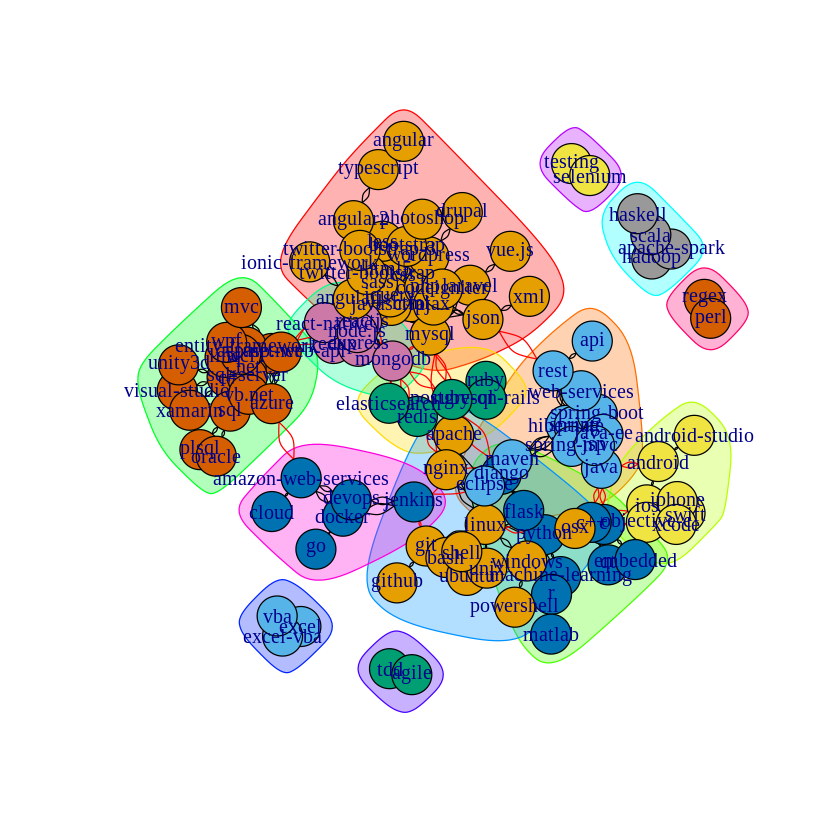

In [20]:
clp <- cluster_label_prop(g1)

plot(clp, g1)


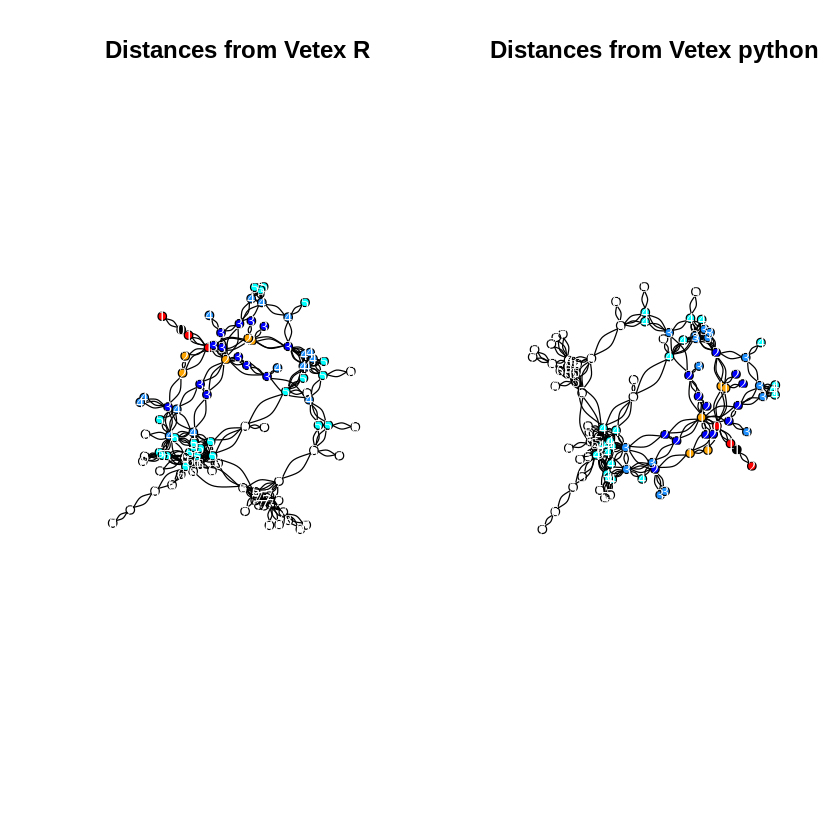

In [21]:
par(mfrow=c(1,2))
gr <- make_ego_graph(g1, diameter(g1), nodes = 'r', mode = c("all"))[[1]]
dists <- distances(gr, "r")
colors <- c("black", "red", "orange", "blue", "dodgerblue", "cyan")
V(gr)$color <- colors[dists+1]
plot(gr, 
     vertex.label = dists, 
     vertex.label.color = "white",
     vertex.label.cex = .8,
     edge.color = 'black',
     vertex.size = 7,
     edge.arrow.size = .05,
     main = " Distances from Vetex R"
     )
gpython <- make_ego_graph(g1, diameter(g1), nodes = 'python', mode = c("all"))[[1]]
dists1 <- distances(gpython, "python")
colors <- c("black", "red", "orange", "blue", "dodgerblue", "cyan")
V(gpython)$color <- colors[dists+1]
plot(gpython, 
     vertex.label = dists1, 
     vertex.label.color = "white",
     vertex.label.cex = .8,
     edge.color = 'black',
     vertex.size = 7,
     edge.arrow.size = .05,
     main = "Distances from Vetex python"
     )

Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


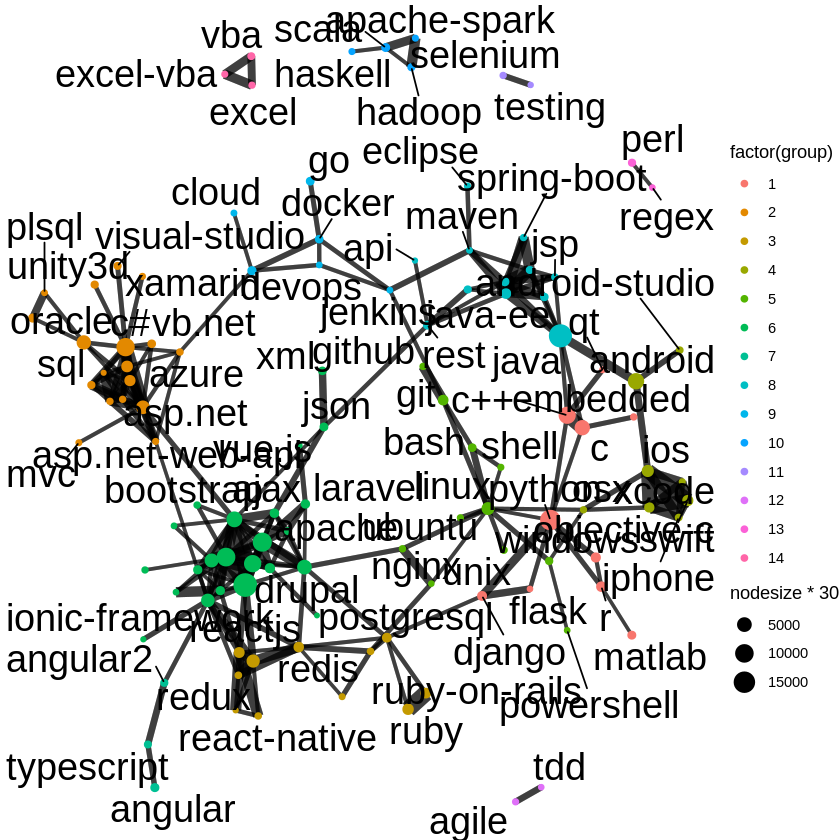

In [22]:
ggraph(g1,layout = "fr") +
  geom_edge_link(aes(width = value), show.legend = FALSE,alpha=0.5) +
  geom_node_point(aes(color = factor(group), size = nodesize*30)) +
  geom_node_text(aes(label = name), repel = TRUE,size=8) +
  theme_void()
